In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#################################################################
# Activity: Beer Foam
#################################################################
# Numerical Solution
k = .2
final_t = 20

def euler_beer(k, final_t):
    delta_t = 0.01
    N = 1000
    t=0
    
    time_list = [t]
    n_list = [N]
    
    while t < final_t:
        dNdt = -k*N
        N += dNdt * delta_t
        t += delta_t
        
        time_list.append(t)
        n_list.append(N)
    return time_list, n_list

In [5]:
Time_list_beer, N_list_beer = euler_beer(k,final_t)

In [6]:
# Analytical Solution
N_0 = 1000
x_range = np.linspace(0,20,2000)
N_list_analytic = []
for i in x_range:
    z = N_0 * np.exp(-k*i)
    N_list_analytic.append(z)

# Fractional Error values
temp_list = []
for i in range(len(N_list_beer)-1):
    temp_list.append(abs((N_list_beer[i]-N_list_analytic[i])/N_list_analytic[i]))

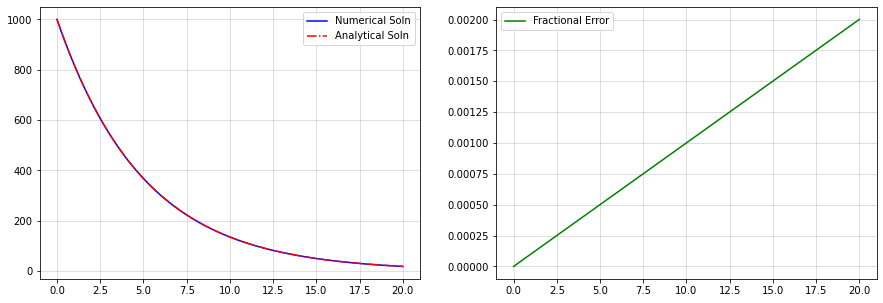

In [7]:
# Plot values
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].plot(Time_list_beer, N_list_beer, label='Numerical Soln', color='blue')
ax[0].grid(alpha=.5)
ax[0].plot(x_range, N_list_analytic, '-.', label='Analytical Soln', color='red')
ax[1].plot(x_range, temp_list, color='green', label='Fractional Error')
ax[1].grid(alpha=.5)
for i in range(2):
    ax[i].legend()

## Romeo and Juliet

In [8]:
# Constants
k1,k2 = 1,0.8                                       

def where_art_thou_Romeo(k_1, k_2, no_of_iterations, delta_t=0.001):  
  #Initialize timestep and initial conditions
    final_t = no_of_iterations*delta_t
    R, J = 1,0
    t=0
    
  #Initialize lists
    time_list= [t]
    romeo_list= [R]
    juliet_list= [J]

  #Set up loop
    while t < final_t:
        dRdt = k_1*J 
        dJdt = -k_2*R

        R += dRdt*delta_t
        J += dJdt*delta_t
        t += delta_t

        time_list.append(t)                      
        romeo_list.append(R)
        juliet_list.append(J)

    return (time_list, romeo_list, juliet_list)

In [9]:
# Initiate lists
Time_list, Romeo_list, Juliet_list = where_art_thou_Romeo(k1, k2, 500, 1/10)
long_list = [Time_list, Romeo_list, Juliet_list]

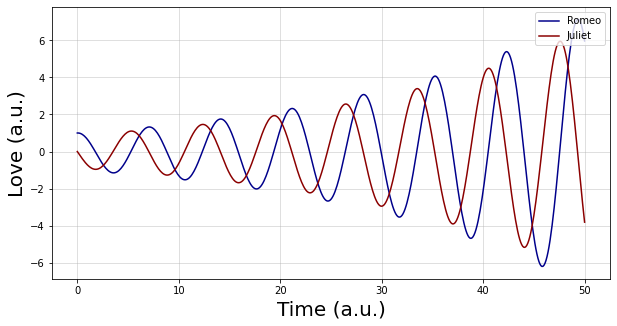

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.plot(long_list[0],long_list[1],label = 'Romeo', color='darkblue')
ax.set_xlabel('Time (a.u.)', size=20)
ax.set_ylabel('Love (a.u.)', size=20)

ax.plot(long_list[0],long_list[2],label='Juliet', color='darkred')
ax.set_xlabel('Time (a.u.)', size=20)
ax.set_ylabel('Love (a.u.)', size=20)

# ax.title('Euler Method Romeo and Juliet', size=20)
ax.grid(alpha = .5)
ax.legend(loc='upper right')

In [11]:
k1,k2 = 1,0.8                                     
no_of_iterations = 500
delta_t = 1/10

def where_art_thou_Romeo_Cromer(k_1, k_2, no_of_iterations, delta_t=0.001):  
  #Initialize timestep and initial conditions
    final_t = no_of_iterations*delta_t
    R, J = 1,0
    t=0
    
  #Initialize lists
    time_list= [t]
    romeo_list= [R]
    juliet_list= [J]

  #Set up loop
    while t < final_t:              # The Euler-Cromer function merely requires changing the order of dJdt assignment
        dRdt = k_1*J 
        R += dRdt*delta_t
        dJdt = -k_2*R
        J += dJdt*delta_t
        t += delta_t

        time_list.append(t)                      
        romeo_list.append(R)
        juliet_list.append(J)

    return (time_list, romeo_list, juliet_list)

In [12]:
# Initiative lists
Time_list_Cromer, Romeo_list_Cromer, Juliet_list_Cromer = where_art_thou_Romeo_Cromer(k1,k2, no_of_iterations, delta_t)
long_list_Cromer = [Time_list_Cromer, Romeo_list_Cromer, Juliet_list_Cromer]

# Calculating the fractional error for each method 
constant_list = []
constant_list_Cromer = []
for i in range(len(long_list_Cromer[0])):
    z = (long_list[1][i]*np.sqrt(k2/k1))**2 + (long_list[2][i])**2
    zz = (long_list_Cromer[1][i]*np.sqrt(k2/k1))**2 + (long_list_Cromer[2][i])**2
    constant_list.append(z)
    constant_list_Cromer.append(zz)

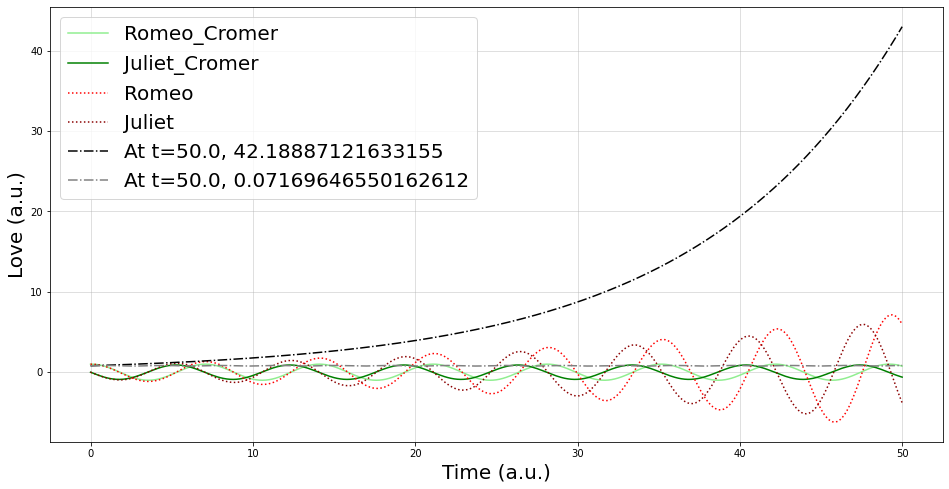

In [13]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(long_list_Cromer[0],long_list_Cromer[1],label = 'Romeo_Cromer', color='lightgreen')
ax.plot(long_list_Cromer[0],long_list_Cromer[2],label='Juliet_Cromer', color='green')
ax.set_xlabel('Time (a.u.)', size=20)
ax.set_ylabel('Love (a.u.)', size=20)


ax.plot(long_list[0], long_list[1], ':', label = 'Romeo', color='red')
ax.plot(long_list[0], long_list[2], ':', label='Juliet', color='darkred')

ax.plot(long_list[0], constant_list, '-.', label=f'At t={no_of_iterations*delta_t}, {(max(constant_list)-min(constant_list))}', color='k')
ax.plot(long_list[0], constant_list_Cromer,'-.', label=f'At t={no_of_iterations*delta_t}, {(max(constant_list_Cromer)-min(constant_list_Cromer))}', color='grey')
###
# ax.title('Euler Method Romeo and Juliet', size=20)
ax.grid(alpha = .5)
ax.legend(loc='upper left', fontsize=20)

In [14]:
def romeo_anal(r_0, k1, k2,t):
    return np.cos(np.sqrt(k1*k2)*t)
def juliet_anal(r_0, k1, k2, t):
    return -np.sqrt(k2/k1)*r_0*np.sin(np.sqrt(k1*k2)*t)
romeo_anal_list = []
juliet_anal_list = []

for i in range(len(Time_list)):
    romeo_anal_list.append(romeo_anal(1,1,0.8,i))
    juliet_anal_list.append(juliet_anal(1,1,0.8,i))

long_list_anal = [Time_list, romeo_anal_list, juliet_anal_list ]
    
# Fractional Error values
temp_list = [[0], [0]]
# long_list and long_list_Cromer
for i in range(len(Time_list)-1):
    for j in range(2):
        
        temp_list[j].append(abs((long_list[j+1][i]-long_list_anal[j][i])))    

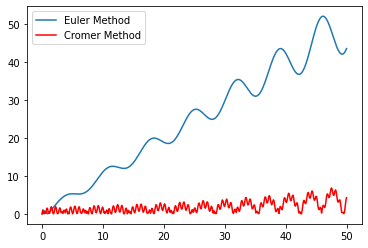

In [15]:
plt.plot(Time_list, temp_list[0], label='Euler Method')
plt.plot(Time_list, temp_list[1], color='red', label='Cromer Method')
plt.legend()

In [19]:
# Constants
k1, k2 = 1, 0.33
R = 1
J = 0

# Exact
final_t = 50
delta_t = 1/10
number_of_iterations = int(final_t/delta_t)

t_true = np.linspace(0, final_t, 100)
R_true = np.cos(np.sqrt(k1*k2)*t_true)
J_true = -np.sqrt(k2/k1)*np.sin(np.sqrt(k1*k2)*t_true)

# Euler
R_list, J_list = [R], [J]

for i in np.linspace(0, final_t, number_of_iterations):
    dR = k1 * J * delta_t
    dJ = -k2 * R * delta_t
    R += dR
    J += dJ
    R_list.append(R)
    J_list.append(J)
#print(R_list)

# Cromer
Time_list_Cromer, Romeo_list_Cromer, Juliet_list_Cromer = where_art_thou_Romeo_Cromer(k1, k2, number_of_iterations, delta_t)

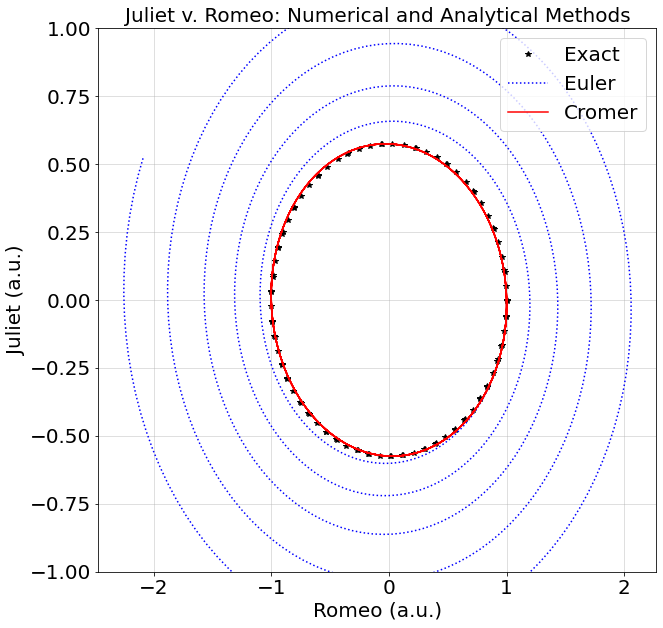

In [20]:
#Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.set_title('Juliet v. Romeo: Numerical and Analytical Methods', size=20)
ax.set_xlabel('Romeo (a.u.)', size=20)
ax.set_ylabel('Juliet (a.u.)', size=20)
ax.tick_params(labelsize=20)
ax.set(ylim=(-1, 1))
ax.grid(alpha = .5)
"""
# GIF
for i in range(number_of_iterations):
    ax.plot(R_true[:i] , J_true[:i], 'k*', label = 'Exact')
    ax.plot(R_list[:i] , J_list[:i], 'b:', label = 'Euler')
    ax.plot(Romeo_list_Cromer[:i], Juliet_list_Cromer[:i], 'r', label = 'Cromer')
    #plt.savefig('gif_image%d.png' % i, transparent=True)
    if i < 1:
        ax.legend(loc='upper right', fontsize=20)
"""    
ax.plot(R_true , J_true, 'k*', label = 'Exact')
ax.plot(R_list , J_list, 'b:', label = 'Euler')
ax.plot(Romeo_list_Cromer , Juliet_list_Cromer, 'r', label = 'Cromer')
ax.legend(loc='upper right', fontsize=20)